<a href="https://colab.research.google.com/github/kachhadiyaraj15/PUBG-Finish-Placement-Prediction/blob/main/AmazonMLchallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon ML Challenge 2023

### Contributors : 
- Nihar Mahesh Gupte, M.tech Electrical Department, IIT Bombay
- Raj Kachhadiya, M.tech Electrical Department, IIIT Bangalore

### Challenge Description :    

- Given a product description and features, predict the dimension of the product

## Kaggle Data Download API calls

In [1]:
!pip install -q kaggle

Upload Kaggle API file (Create new API token from Kaggle and upload kaggle.json)

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajkachhadiya","key":"c11ffe32f3a6e8bb02e9b171c798ec84"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d ashisparida/amazon-ml-challenge-2023

 99% 1.61G/1.63G [00:20<00:00, 95.3MB/s]
100% 1.63G/1.63G [00:20<00:00, 84.8MB/s]


In [7]:
!unzip amazon-ml-challenge-2023.zip

Archive:  amazon-ml-challenge-2023.zip
  inflating: datasetb2d9982/dataset/sample_submission.csv  
  inflating: datasetb2d9982/dataset/test.csv  
  inflating: datasetb2d9982/dataset/train.csv  
  inflating: total_sentence_data/total_sentence_data/total_sentence_test.csv  
  inflating: total_sentence_data/total_sentence_data/total_sentence_train.csv  


### Exploratory Data Analysis

In [11]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("datasetb2d9982/dataset/train.csv")
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [ ]:
print("NULL Values of the Dataset")
print("-"*30)
print(df.isna().sum())
print("-"*30)

NULL Values of the Dataset
------------------------------
PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64
------------------------------


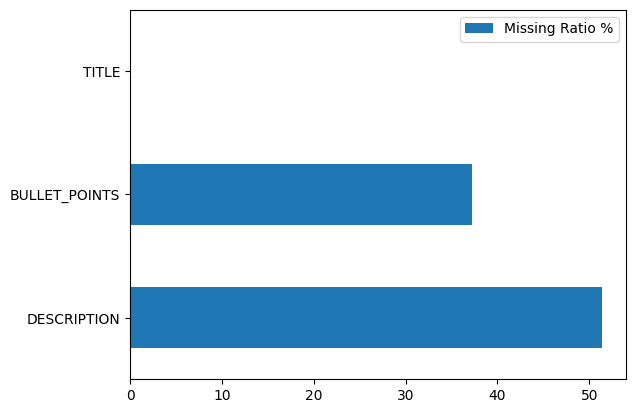

In [ ]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [15]:
print("Unique products")
print(df["PRODUCT_TYPE_ID"].nunique())

Unique products
12907


[ 5977   649  1195  5042  5400 10438  4604 12793  3484 10828]


<Figure size 800x600 with 0 Axes>

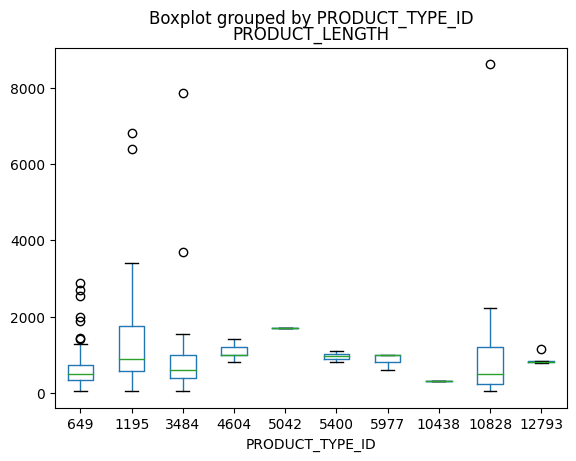

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def bp_product_length(df: pd.DataFrame):
  random_products = np.random.choice(df['PRODUCT_TYPE_ID'].unique(), size=10, replace=False)
  print(random_products)
  selected_data = df[df['PRODUCT_TYPE_ID'].isin(random_products)][['PRODUCT_TYPE_ID', 'PRODUCT_LENGTH']]
  plt.figure(figsize=(8, 6))
  selected_data.boxplot(by ='PRODUCT_TYPE_ID', column =['PRODUCT_LENGTH'], grid = False)

bp_product_length(df)